In [111]:
#matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymc3 as pm

In [112]:
import fit_func_1 as ff

In [113]:
res_df = pd.read_pickle('res.pkl')
res_df.head()

Vmax_o                         a_o                          t_o  \
                 m       lo       hi         m        lo        hi        m   
cont_r1_1  113.708  86.7459  171.602 -0.496073  -0.72075 -0.282157  2.58959   
cont_r2_1  168.705  121.913  260.121 -0.638321  -0.97021 -0.392384  1.37942   
cont_r2_2  158.233  112.862  274.149 -0.777375  -1.22541 -0.407417  1.46866   
cont_r3_1  134.244  94.3304  215.622 -0.526833 -0.758632 -0.334343  1.38649   
cont_r3_2  125.533  87.2236  208.014 -0.532076 -0.875509 -0.305781  2.29106   

                                 nu_o  ...        a1         t1               \
                 lo       hi        m  ...        hi          m           lo   
cont_r1_1  0.407097  3.56701  1.09752  ... -0.387501    1.34891     0.457062   
cont_r2_1 -0.336786  2.30887  1.16655  ...   -2.2876   0.484375     0.334889   
cont_r2_2 -0.351767  2.47813  1.13571  ...  -1.26368   0.362816    0.0823504   
cont_r3_1 -0.860039  2.65352  1.17964  ...  -1.98146  0.0551291  1.93629e-05   
cont_r3_2 -0.124318  3.67943  1.08455  ...  -1.98728    0.10798    0.0190148   

                          nu1                      Vmin_n                    
                 hi         m        lo       hi        m       lo       hi  
cont_r1_1   2.38211    1.0027  0.577709  1.55834  5.61786  1.03462  12.8875  
cont_r2_1  0.634513  0.867213   0.53751  1.28243  7.46282  2.85377  11.3701  
cont_r2_2  0.723905   0.88954  0.499671  1.38993  6.85994  1.63301  13.7769  
cont_r3_1    0.1223  0.808412  0.491042  1.17112  8.88735  6.74903  11.1684  
cont_r3_2  0.203121  0.817269  0.477243  1.20575  7.82162  3.16581  12.1973  

[5 rows x 39 columns]

Text(0, 0.5, 'a0')

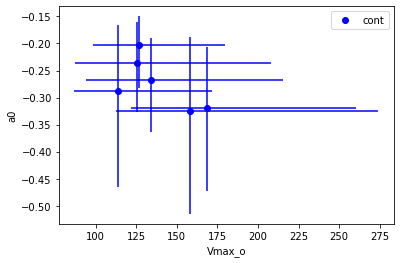

In [163]:
var1 = ff.var_names[0]
var2 = ff.var_names[6]
treats = 'cont caged_d04 caged_d07 caged_d10'.split()
colors = 'blue green orange  red'.split()[:1]
for treat,color in zip(treats,colors):
    mask = res_df.index.str.contains(treat)
    m1,l1,h1 = res_df.loc[mask,var1].values.T 
    m2,l2,h2 = res_df.loc[mask,var2].values.T
    
    plt.plot(m1,m2,'o',color=color,label=treat)
    plt.errorbar(m1,m2,yerr=[m2-l2,h2-m2],xerr=[m1-l1,h1-m1],ls='',color=color  )
    plt.legend()
plt.xlabel(var1)
plt.ylabel(var2)

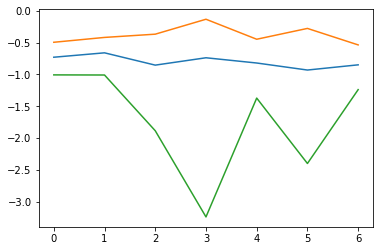

In [156]:
plt.plot(m2)
plt.plot(h2)
plt.plot(l2)

In [56]:
res_df.loc[mask,(var1,'m')]

caged_d10_r1_3    12.0173
caged_d10_r1_1    11.0939
caged_d10_r1_2    11.7365
caged_d10_r1_4    5.33241
caged_d10_r3_1    9.01947
caged_d10_r3_2    7.50302
caged_d10_r3_3    7.88296
Name: (Vmin_n, m), dtype: object

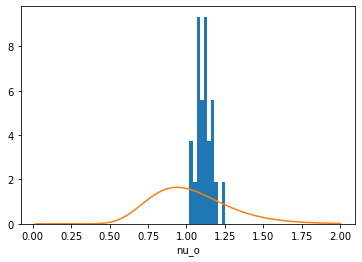

In [105]:


var = ff.var_names[3]
plt.hist( res_df[(var,'m')],density=True)
plt.xlabel(var)
if( var=='Vmax_o'):
    dist = pm.Lognormal.dist( mu=np.log(150),sd=0.5)
    xx = np.linspace(0,500,101)
    plt.plot(xx,np.exp(dist.logp(xx).eval()))
if( var=='a_o'):
    dist = pm.HalfNormal.dist(sd=2)
    xx = np.linspace(0,5,101)
    plt.plot(-xx,np.exp(dist.logp(xx).eval()))
if( var=='t_o'):
    dist = pm.Normal.dist(       mu=6  ,sd=6)
    xx = np.linspace(-5,5,101)
    plt.plot(xx,np.exp(dist.logp(xx).eval()))
if( var=='nu_o'):
    dist =  pm.Lognormal.dist(  mu=np.log(1), sd=0.25)
    xx = np.linspace(0,2,101)
    plt.plot(xx,np.exp(dist.logp(xx).eval()))    
if( var=='Vmin_o'):
    dist =  pm.Lognormal.dist(   mu=np.log(  10),sd=0.6)
    xx = np.linspace(0,20,101)
    plt.plot(xx,np.exp(dist.logp(xx).eval()))  
    
   

In [110]:
ff.var_names

['Vmax_o',
 'a_o',
 't_o',
 'nu_o',
 'Vmin_o',
 'Vmax_n',
 'a0',
 't0',
 'nu0',
 'a1',
 't1',
 'nu1',
 'Vmin_n']